# Regression Analysis
## Objective: Predict the next day's Closing Price using Linear & Polynomial Regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
# Load Data
df = pd.read_csv('../data/nifty50_2000_2025.csv', header=[0, 1], index_col=0, parse_dates=True)
df.columns = [col[0] for col in df.columns]

# Feature Engineering: Use Previous Day's Data to Predict Today's Close
df['Prev_Close'] = df['Close'].shift(1)
df['Prev_Open'] = df['Open'].shift(1)
df['Prev_High'] = df['High'].shift(1)
df['Prev_Low'] = df['Low'].shift(1)
df['Prev_Volume'] = df['Volume'].shift(1)

# Drop NaNs created by shifting
df = df.dropna()

X = df[['Prev_Close', 'Prev_Open', 'Prev_High', 'Prev_Low', 'Prev_Volume']]
y = df['Close']

print('Features Shape:', X.shape)
print('Target Shape:', y.shape)

Features Shape: (4464, 5)
Target Shape: (4464,)


In [3]:
# Train-Test Split (Time Series Split - No Shuffling)
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print('Train Size:', len(X_train))
print('Test Size:', len(X_test))

Train Size: 3571
Test Size: 893


In [4]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print(f'Linear Regression RMSE: {rmse:.2f}')
print(f'Linear Regression R2 Score: {r2:.4f}')

Linear Regression RMSE: 171.25
Linear Regression R2 Score: 0.9970


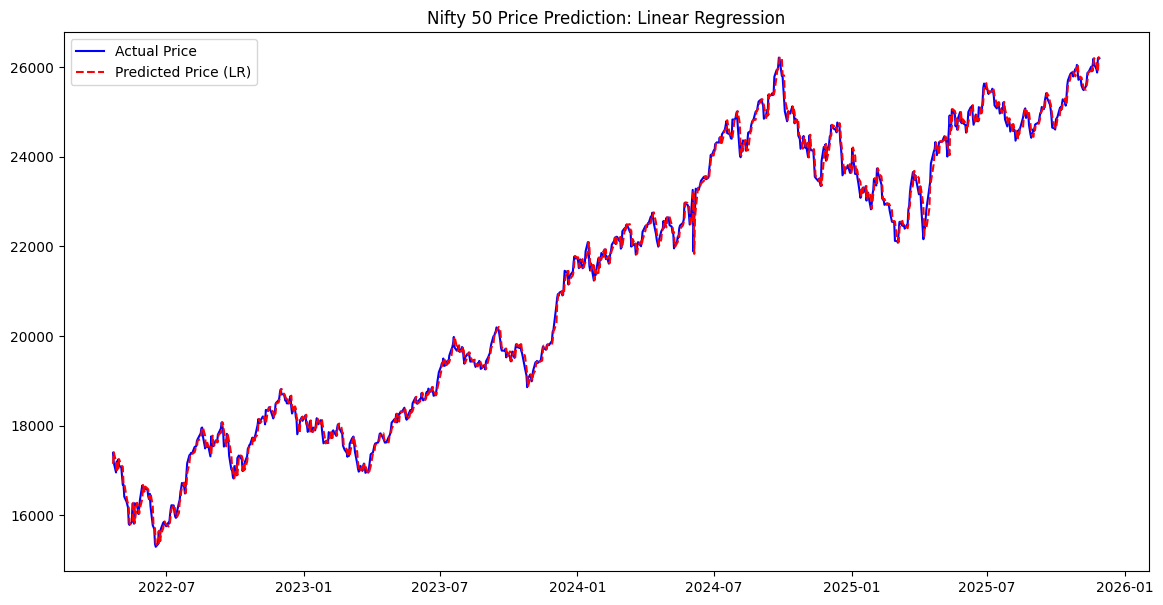

In [5]:
# Visualize Predictions vs Actual
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred_lr, label='Predicted Price (LR)', color='red', linestyle='--')
plt.title('Nifty 50 Price Prediction: Linear Regression')
plt.legend()
plt.show()

In [6]:
# 2. Polynomial Regression (Degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

# Evaluation
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Polynomial Regression RMSE: {rmse_poly:.2f}')
print(f'Polynomial Regression R2 Score: {r2_poly:.4f}')

Polynomial Regression RMSE: 175.69
Polynomial Regression R2 Score: 0.9969
